**Analysis for snow cover in India**<br>
The data here is 8-day data and analysis is done for 1x1 degree

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import scipy
import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
SNOWCOVER_PATH="snowcover/data/" #path for snowcover data
COVID_PATH="covidoxford/data/" # path for covidoxford data
CITIES_PATH="cities/data/" # path for cities data

In [9]:
cities_df=pd.read_csv(CITIES_PATH+"cities_1degx1deg.csv",error_bad_lines=False)

b'Skipping line 164: expected 5 fields, saw 6\n'


In [10]:
sc_df=pd.read_csv(SNOWCOVER_PATH+"indian_cities_1degx1deg_snowcover.csv")
sc_df["metric"].unique()

array(['Eight_Day_CMG_Snow_Cover'], dtype=object)

In [11]:
metric_df=sc_df[(sc_df["metric"]=="Eight_Day_CMG_Snow_Cover")&(sc_df["mean"]>=0)&(sc_df["mean"]<=100)&(~sc_df["mean"].isna())]

**Total 33 locations with snow in India**

In [12]:
valid_locations=metric_df[metric_df["mean"]>=10]["location"].unique().tolist()
print("locations with snow =",len(valid_locations))
metric_df=metric_df[metric_df["location"].isin(valid_locations)]

locations with snow = 33


**Snow cover analysis for pre and post covid dates/week for 2019 and 2020.**<br>
snow cover change analysed for march 1st and may 1st week for 2019 (non-covid year) and for 2020 (covid year). Differences for 2019 and for 2020 are taken and distributions are plotted.

       diff_2019  diff_2020    population    elevation
count  32.000000  32.000000  3.200000e+01    32.000000
mean  -12.593750  -1.125000  2.103418e+05  1186.687500
std    15.156941  11.471564  3.052831e+05   990.126823
min   -72.000000 -16.000000  1.834000e+03     9.000000
25%   -19.000000  -8.250000  1.802275e+04   496.750000
50%    -8.500000  -1.000000  7.633200e+04   835.000000
75%    -1.750000   0.000000  2.516800e+05  1625.000000
max     0.000000  41.000000  1.332033e+06  3560.000000


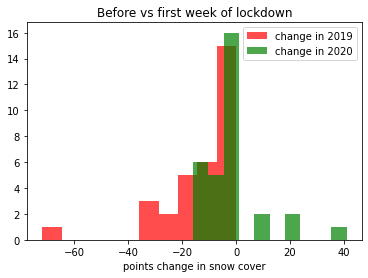

In [13]:
week1="3.2019.week1"
week2="5.2019.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])#*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="5.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])#*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=10,label="change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=10,label="change in 2020",color="green",alpha=0.7)
plt.legend()
plt.xlabel('points change in snow cover')
plt.title("Before vs first week of lockdown")
plt.show()

Compared to first week of march, snow cover, on an average,
- decreased 4.5 points (2019), increased 4 points(2020), in first week of april
- decreased 12 points (2019), decreased 1.5 points(2020), in first week of may
- decreased 15 points (2019), decreased 5 points(2020), in first week of june
- decreased 21 points (2019), decreased 12 points(2020), in first week of august
- decreased 21 points (2019), decreased 15 points(2020), in first week of october
- decreased 5 points (2019), increased 5 points(2020), in first week of december

**snow places where difference greater than 10 points are seen with its elevation and population**

In [14]:
week_df[(week_df["diff_2020"]-week_df["diff_2019"]>=10)]

,location,diff_2019,diff_2020,city,population,elevation
3,28.5#96.5,-72,-11,Hayuliang,1834,559
7,31.5#77.5,-35,-16,Shimla,225765,1564
10,33.5#76.5,-4,41,Padam,25000,3560
11,28.5#95.5,-25,-5,Pasighat,25581,179
12,33.5#75.5,-31,20,Anantnag,200642,1540
15,28.5#94.5,-19,0,Along,31735,704
26,27.5#91.5,-26,-10,Tawang,4831,2432
28,34.5#75.5,-7,11,Pahlgam,7750,2155
30,33.5#74.5,-21,-8,Punch,114564,1380
31,34.5#74.5,-31,20,Srinagar,1332033,1745


**Hayuliang, Shimla, Pasighat, Anantnag, Along, Tawang, Punch and Srinagar saw quite lesser (at least 10 points) melting of snow during the duration of lockdown compared to 2019**

In [15]:
week1="3.2019.week1"
week2="3.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])
week_df["diff"].describe()

count    32.00000
mean    -11.06250
std      14.84965
min     -50.00000
25%     -15.50000
50%      -4.00000
75%      -1.00000
max       3.00000
Name: diff, dtype: float64

**The snow cover hasnt actually increased in 2020. So probably, the melting of snow is dynamic and is different in amount in different weeks. It looks like in lockdown months the decrease in snow cover is lesser in 2020 compared to 2019, but the snow cover in total hasnt changed much.**

In [16]:
metric_df[metric_df["mean"]>=50]["location"].unique()

array(['32.5#76.5', '28.5#96.5', '31.5#77.5', '34.5#77.5', '33.5#76.5',
       '33.5#75.5', '32.5#77.5', '30.5#79.5', '34.5#76.5', '34.5#75.5',
       '34.5#74.5', '27.5#88.5', '27.5#92.5', '33.5#74.5', '30.5#78.5',
       '29.5#80.5', '27.5#91.5'], dtype=object)

**locations with snow cover change by more than 50 points are displayed.**<br>
Plot for one such location(shimla) is done. The data is 8-day hence mapped to 4 weeks a month. Here analysis if done for 4 months and each months has 4 weeks hence 24 datapoints for year 2019 and 2020.

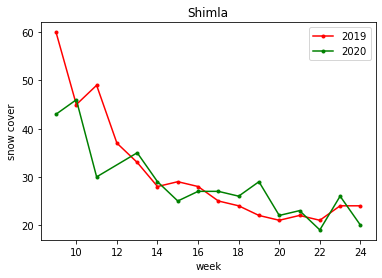

In [17]:
location="31.5#77.5"
location_data=metric_df[metric_df["location"]==location].set_index("week")["mean"].to_dict()
x_2019=[]
y_2019=[]
x_2020=[]
y_2020=[]
for month in range(3,7):
    for week in range(1,5):
        week_str=str(month)+".2019.week"+str(week)
        if week_str in location_data:
            x_2019.append((month-1)*4+week)
            y_2019.append(location_data[week_str])
        week_str=str(month)+".2020.week"+str(week)
        if week_str in location_data:
            x_2020.append((month-1)*4+week)
            y_2020.append(location_data[week_str])
plt.plot(x_2019,y_2019,color="red",marker=".",label="2019")
plt.plot(x_2020,y_2020,color="green",marker=".",label="2020")
plt.title(cities_df[cities_df["location"]==location]["city"].values[0])
plt.xlabel("week")
plt.ylabel("snow cover")
plt.legend()
plt.show()